In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *

In [2]:
path = Path('../../data/large')

In [3]:
ab = pd.read_csv(path/'dC_01.csv', header=None).values[0]
bestKnow = pd.read_csv(path/'Best_Know1Fxs.csv', header=None).values[0][:100].astype(float)
bestKnow_sum_constraints = pd.read_csv(path/'Best_Know1SumCV.csv', header=None).values[0][:100].astype(float)
java_results = pd.read_csv(path/'Feasibility1Fs.csv', header=None).values[0]
java_results = java_results[:-1].astype(float)
java_results_all = pd.read_csv(path/'Feasibility1Fs.csv', header=None).iloc[:,:-1]

In [4]:
D = 30
nn_window = 5
nn_nf = 4
frequency = 1_000_000
max_times = len(ab)
total_generations = max_times * frequency + 1000

In [5]:
def fitness_func(indiv, b, t): return (indiv.data**2).sum()
def constraint_func(indiv, b, t): return -b[t] + sum((1/np.sqrt(D))*indiv.data)

population = Population.new_random(dimension=D)

opt = Optimization(population, fitness_func, constraint_func, constraint_params=[ab],
                   max_times=max_times, frequency=frequency, callbacks=[OnChangeRestartPopulation],
                   optimal_fitness_values=bestKnow, optimal_sum_constraints=bestKnow_sum_constraints)
opt.state_dict

{'gen': 0, 'evals': 0, 'time': 0, 'time_evals': 0, 'best': None}

Total time: 3:35:45


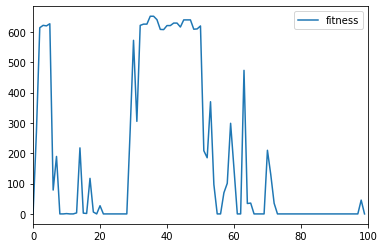

In [6]:
opt.run(total_generations, update_each=1)

In [16]:
df = pd.DataFrame({'fitness':opt.recorder.best_times_fitness, 'sum_constraints':opt.recorder.best_times_constraints})
df.head()

,fitness,sum_constraints
0,1.143474e-252,0.000000
1,2.698291e+02,0.000000
2,6.136934e+02,0.680856
3,6.215836e+02,22.593960
4,6.198378e+02,14.874278


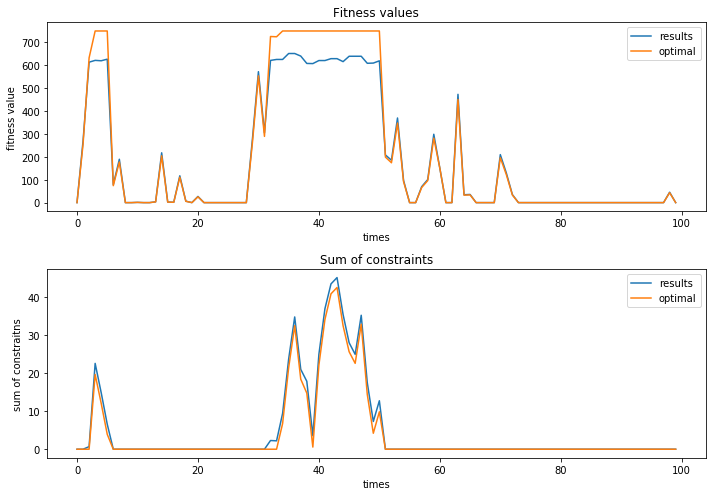

In [31]:
opt.recorder.plot();

In [36]:
out = Path('../../data/results/large')
out.mkdir(parents=True, exist_ok=True)
df.to_csv(out/'best_known_1e6.csv', index=False)